## Let's peek at a sample of the NLS data

In [3]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [4]:
!pip install pycountry

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
import pycountry

def get_language_name(code):
    try:
        return pycountry.languages.get(alpha_3=code).name
    except AttributeError:
        return code  # fallback to code if not found


In [10]:
records = []
with open('txtBIBLIOGRAPHIC_11573881650004341_01.txt', encoding='utf-8') as f:
    for line in f:
        fields = [field.strip() for field in line.strip().split('\t') if field.strip()]
        record = {}
        for field in fields:
            if ':' in field:
                key, value = field.split(':', 1)
                record[key.strip()] = value.strip()
        records.append(record)

df = pd.DataFrame(records)
df.head()

,Title,Creator,Type,Publisher,Date,Language,Format,Relation,Rights,Identifier,Description,Subject,Coverage,Contributor,Source
0,Travel /,"Leeson, Edward,1947-2011.",text,London J. Murray,1980,eng,,,,,,"Short stories, English.",,,
1,Resource book of test items in chemistry,"Jenkins, E. W.(Edgar William)",text,London Murray,1981,eng,,,,,Bibliography: p15,Chemistry,,,
2,Arbitration for contractors,"Stephenson, Douglas A.",text,Northwood Books,1982,,,,,,,,,,
3,Armorial bearings of the sovereigns of England...,"Petchey, William John. Browne, Royman. Standin...",text,London Bedford Square Press [for the] Standing...,1977,eng,,,,,"Previous ed.: i.e. Revised ed., published as '...",Heraldry,,,
4,"Sharing caring : caring, equal opportunities a...","Thompson, Catherine.",text,Community Care Project,[1985],,,,,,,,,,


In [11]:
df['Type'].unique()

array(['text', 'notated music',
       'textBroadsidesEnglandLondon1801-1900.rbgenr',
       'textBroadsidesScotlandEdinburgh1801-1900.rbgenr',
       'textFree verse.fast(OCoLC)fst01921664Lyric poetry.fast(OCoLC)fst01921718Narrative poetry.fast(OCoLC)fst01726682Poetry.fast(OCoLC)fst01423828',
       'cartographic', 'textBroadsidesEnglandLewes1801-1900.rbgenr',
       'textHorror tales.gsafd', 'textAnnotations1801-1900rbprov',
       'textChapbooksEnglandLondon1701-1800.rbgenr',
       'textJuvenile works.fast(OCoLC)fst01411637Trivia and miscellanea.fast(OCoLC)fst01921748',
       'still image', 'textHistory.fast(OCoLC)fst01411628',
       'textPeriodical.',
       'text(DE-588)4067488-5https://d-nb.info/gnd/4067488-5(DE-101)040674886Zeitschriftgnd-content',
       "textChildren's stories.Fiction.fast(OCoLC)fst01423787Juvenile works.fast(OCoLC)fst01411637",
       'textBiographies.fast(OCoLC)fst01919896',
       'notated musicArt music.lcgftSongs.lcgftScores.lcgft',
       'textPictori

Columns: ['Title', 'Creator', 'Type', 'Publisher', 'Date', 'Language', 'Format', 'Relation', 'Rights', 'Identifier', 'Description', 'Subject', 'Coverage', 'Contributor', 'Source', 'Language_Full']

Sample data:


,Title,Creator,Type,Publisher,Date,Language,Format,Relation,Rights,Identifier,Description,Subject,Coverage,Contributor,Source,Language_Full
0,Travel /,"Leeson, Edward,1947-2011.",text,London J. Murray,1980,eng,,,,,,"Short stories, English.",,,,English
1,Resource book of test items in chemistry,"Jenkins, E. W.(Edgar William)",text,London Murray,1981,eng,,,,,Bibliography: p15,Chemistry,,,,English
2,Arbitration for contractors,"Stephenson, Douglas A.",text,Northwood Books,1982,,,,,,,,,,,
3,Armorial bearings of the sovereigns of England...,"Petchey, William John. Browne, Royman. Standin...",text,London Bedford Square Press [for the] Standing...,1977,eng,,,,,"Previous ed.: i.e. Revised ed., published as '...",Heraldry,,,,English
4,"Sharing caring : caring, equal opportunities a...","Thompson, Catherine.",text,Community Care Project,[1985],,,,,,,,,,,


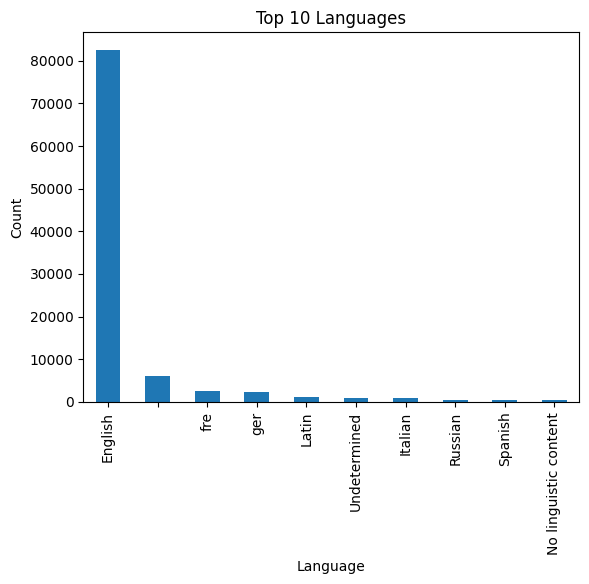

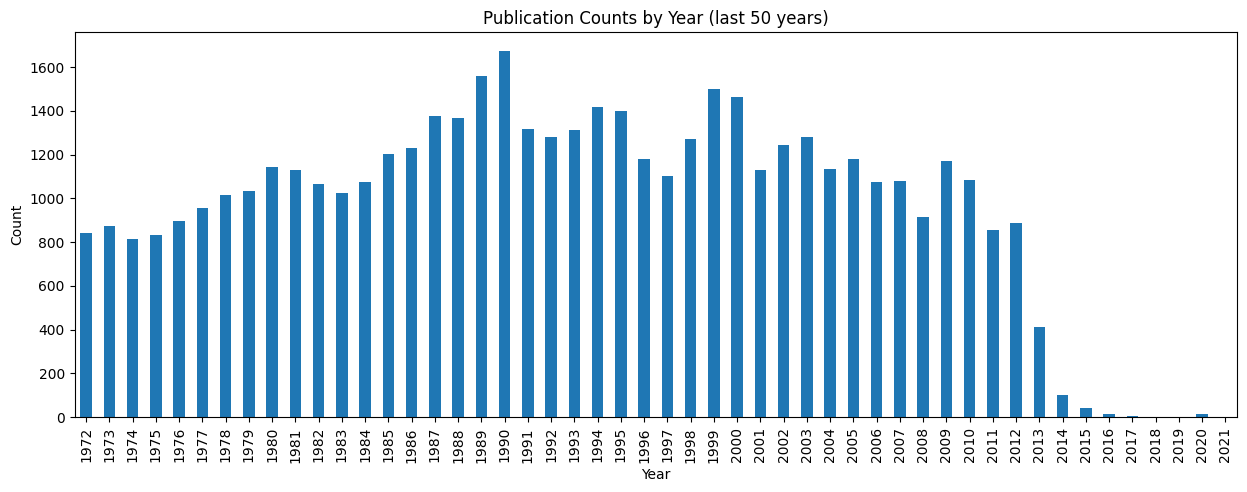

In [12]:
df['Language_Full'] = df['Language'].apply(get_language_name)

# Show basic info about the dataframe
print("Columns:", df.columns.tolist())
print("\nSample data:")
display(df.head())


# Visualize the most common languages
top_languages = df['Language_Full'].value_counts().head(10)
top_languages.plot(kind='bar', title='Top 10 Languages')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

# Visualize the most common publication years (extracting year from 'Date')
df['Year'] = df['Date'].str.extract(r'(\d{4})')
top_years = df['Year'].value_counts().sort_index().tail(50)
top_years.plot(kind='bar', figsize=(15,5), title='Publication Counts by Year (last 50 years)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [92]:
print("Total records:", len(df))

# Find years with unusually low publication counts (potential gaps)
year_counts = df['Year'].value_counts().sort_index()
mean_count = year_counts.mean()
print("Mean publication count per year:", mean_count)
std_count = year_counts.std()
print("Standard deviation of publication counts:", std_count)
gap_years = year_counts[year_counts < (mean_count - std_count)]
print(f"Years with unusually low publication counts (potential gaps): {list(gap_years.index)}")

# Find languages with very few records (potentially underrepresented)
rare_languages = df['Language_Full'].value_counts()
rare_languages = rare_languages[rare_languages < 50]
print("Languages with fewer than 50 records (potential gaps):")
display(rare_languages)

# Find subjects that are common in other libraries but rare here (if you have a reference list)
# For now, just show the least common subjects in this dataset
subject_counts = df['Subject'].value_counts()
rare_subjects = subject_counts[subject_counts < 10]
print("Subjects with fewer than 10 records (potential gaps):")
display(rare_subjects)

Total records: 100000
Mean publication count per year: 158.61333333333334
Standard deviation of publication counts: 316.1963846072198
Years with unusually low publication counts (potential gaps): []
Languages with fewer than 50 records (potential gaps):


Language_Full
Multiple languages    45
Scots                 44
cze                   41
Irish                 39
Arabic                39
                      ..
Cree                   1
Azerbaijani            1
Galolen                1
Timne                  1
alb                    1
Name: count, Length: 104, dtype: int64

Subjects with fewer than 10 records (potential gaps):


Subject
City planning Regional planning                9
Painting                                       9
Crime prevention                               9
Business &amp; Economics Economic History      9
Zoology                                        9
                                              ..
Recidivism Criminal behavior, Prediction of    1
Telecommunication systems Disaster relief      1
PowerBuilder. Application software             1
Slavery Sectionalism (United States)           1
Shipping Steamboats Tea trade                  1
Name: count, Length: 30615, dtype: int64

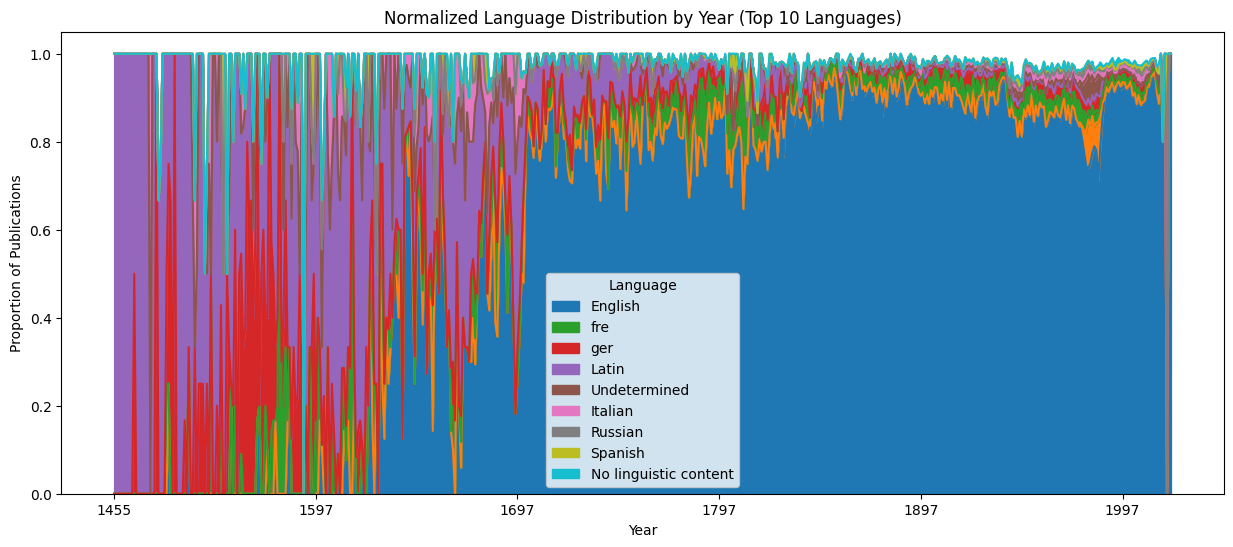

In [78]:
# Group by Year and Language, count publications
lang_year_counts = df.groupby(['Year', 'Language_Full']).size().unstack(fill_value=0)

# Normalize by total publications per year
lang_year_norm = lang_year_counts.div(lang_year_counts.sum(axis=1), axis=0)

# Plot normalized language distribution for top 10 languages
top_languages = df['Language_Full'].value_counts().head(10)
top_langs = top_languages.index[:10]
lang_year_norm[top_langs].plot(kind='area', stacked=True, figsize=(15,6), colormap='tab10')
plt.title('Normalized Language Distribution by Year (Top 10 Languages)')
plt.xlabel('Year')
plt.ylabel('Proportion of Publications')
plt.legend(title='Language')
plt.show()

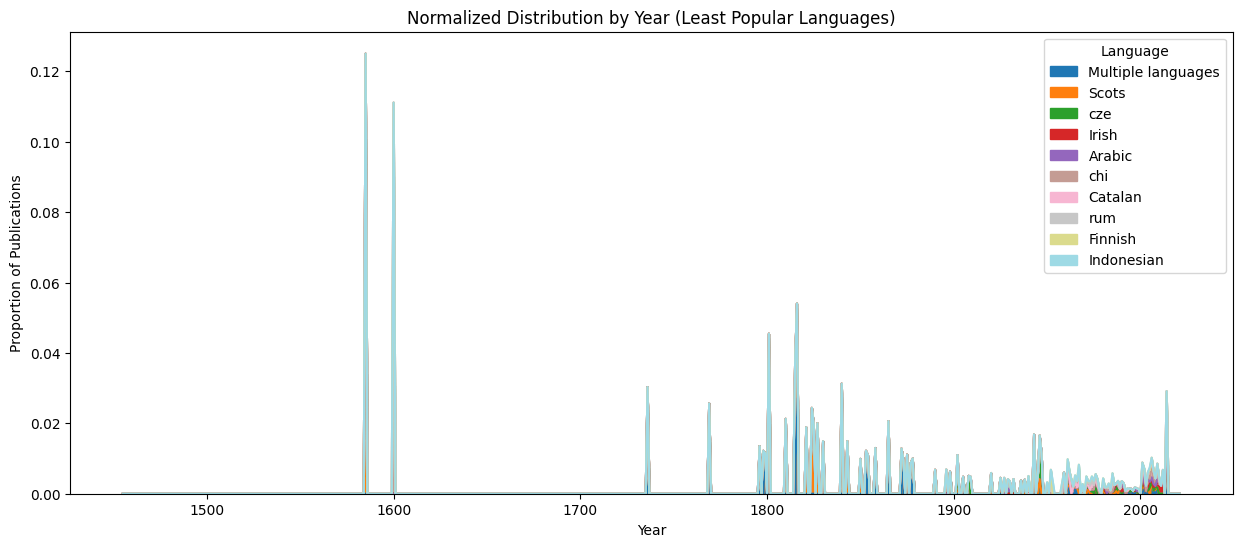

In [93]:
# Plot normalized distribution for least popular languages (from rare_languages)
least_popular_langs = rare_languages.index[:10]
lang_year_norm[least_popular_langs].plot(kind='area', stacked=True, figsize=(15,6), colormap='tab20')
plt.title('Normalized Distribution by Year (Least Popular Languages)')
plt.xlabel('Year')
plt.ylabel('Proportion of Publications')
plt.legend(title='Language')
plt.show()

/var/folders/lj/04hpcjd52tn74mrbmxn522fh0000gp/T/ipykernel_40755/395901472.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


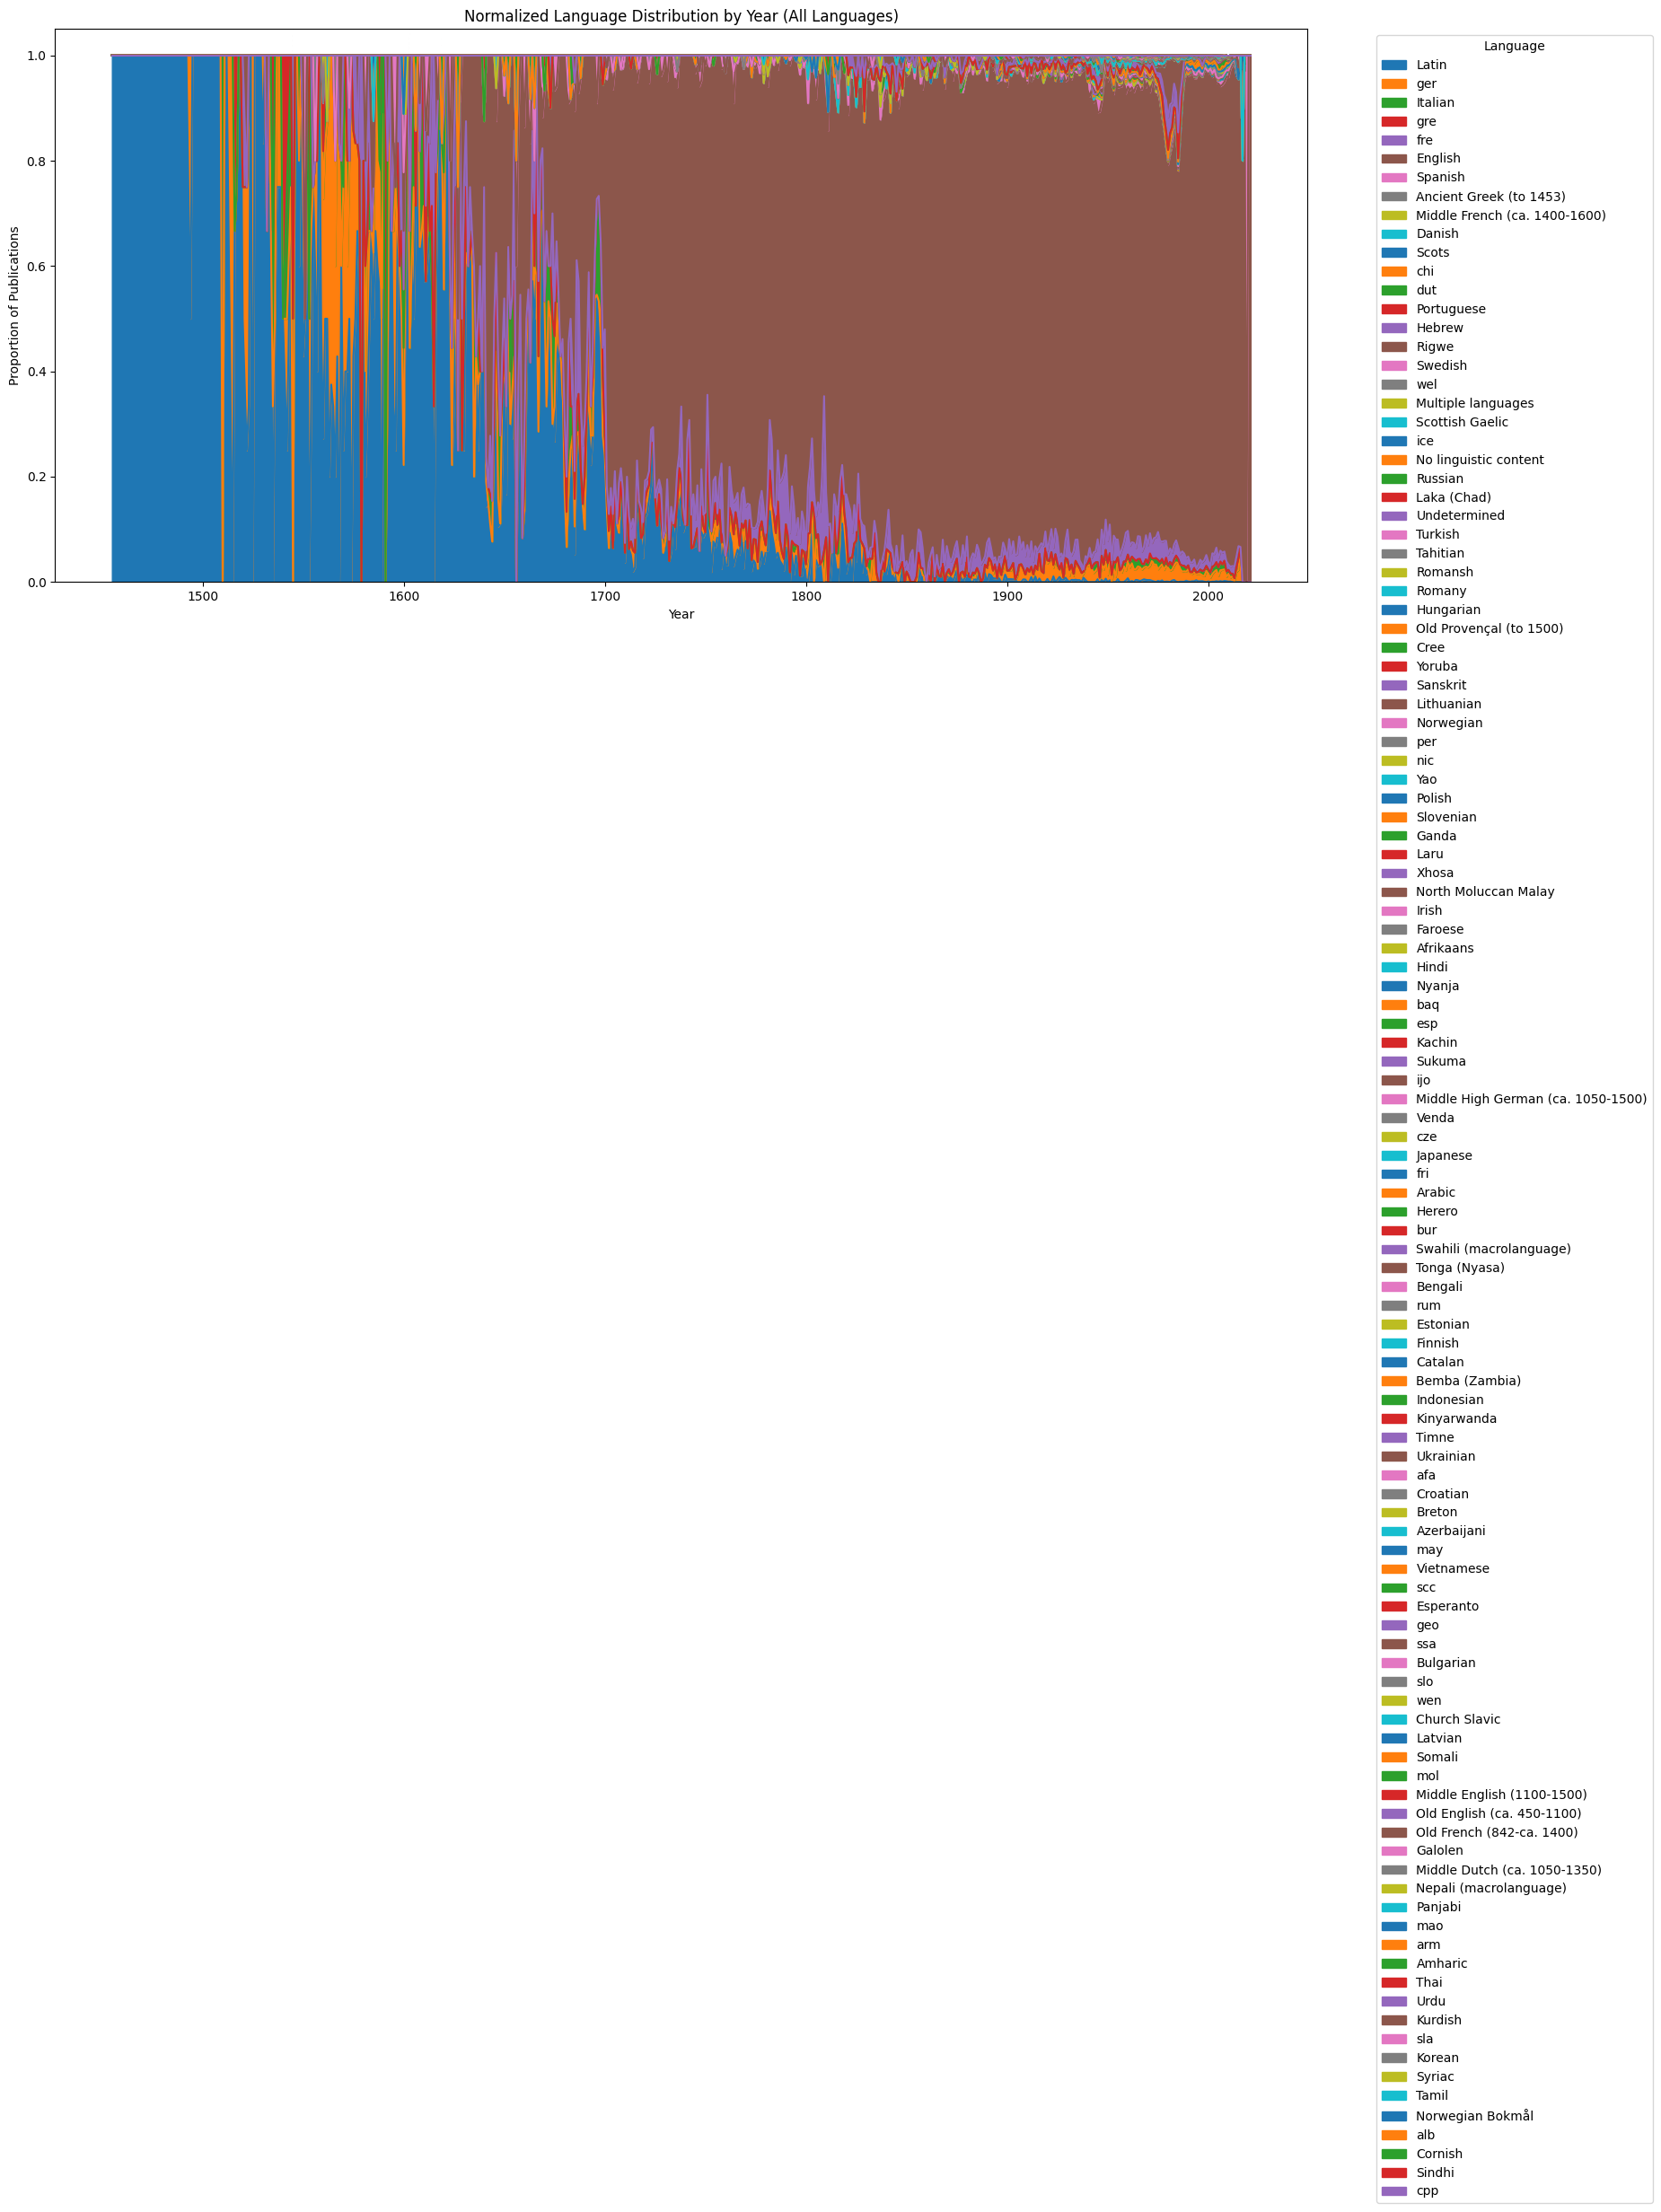

In [94]:
# Plot normalized language distribution for all languages across years
ax = lang_year_norm.plot(kind='area', stacked=True, figsize=(18,8), legend=True)
plt.title('Normalized Language Distribution by Year (All Languages)')
plt.xlabel('Year')
plt.ylabel('Proportion of Publications')
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [95]:
print("All languages in the dataset:")
print(lang_year_norm.columns.tolist())

All languages in the dataset:
['Latin', 'ger', 'Italian', 'gre', 'fre', 'English', 'Spanish', 'Ancient Greek (to 1453)', 'Middle French (ca. 1400-1600)', 'Danish', 'Scots', 'chi', 'dut', 'Portuguese', 'Hebrew', 'Rigwe', 'Swedish', 'wel', 'Multiple languages', 'Scottish Gaelic', 'ice', 'No linguistic content', 'Russian', 'Laka (Chad)', 'Undetermined', '', 'Turkish', 'Tahitian', 'Romansh', 'Romany', 'Hungarian', 'Old Provençal (to 1500)', 'Cree', 'Yoruba', 'Sanskrit', 'Lithuanian', 'Norwegian', 'per', 'nic', 'Yao', 'Polish', 'Slovenian', 'Ganda', 'Laru', 'Xhosa', 'North Moluccan Malay', 'Irish', 'Faroese', 'Afrikaans', 'Hindi', 'Nyanja', 'baq', 'esp', 'Kachin', 'Sukuma', 'ijo', 'Middle High German (ca. 1050-1500)', 'Venda', 'cze', 'Japanese', 'fri', 'Arabic', 'Herero', 'bur', 'Swahili (macrolanguage)', 'Tonga (Nyasa)', 'Bengali', 'rum', 'Estonian', 'Finnish', 'Catalan', 'Bemba (Zambia)', 'Indonesian', 'Kinyarwanda', 'Timne', 'Ukrainian', 'afa', 'Croatian', 'Breton', 'Azerbaijani', 'may',

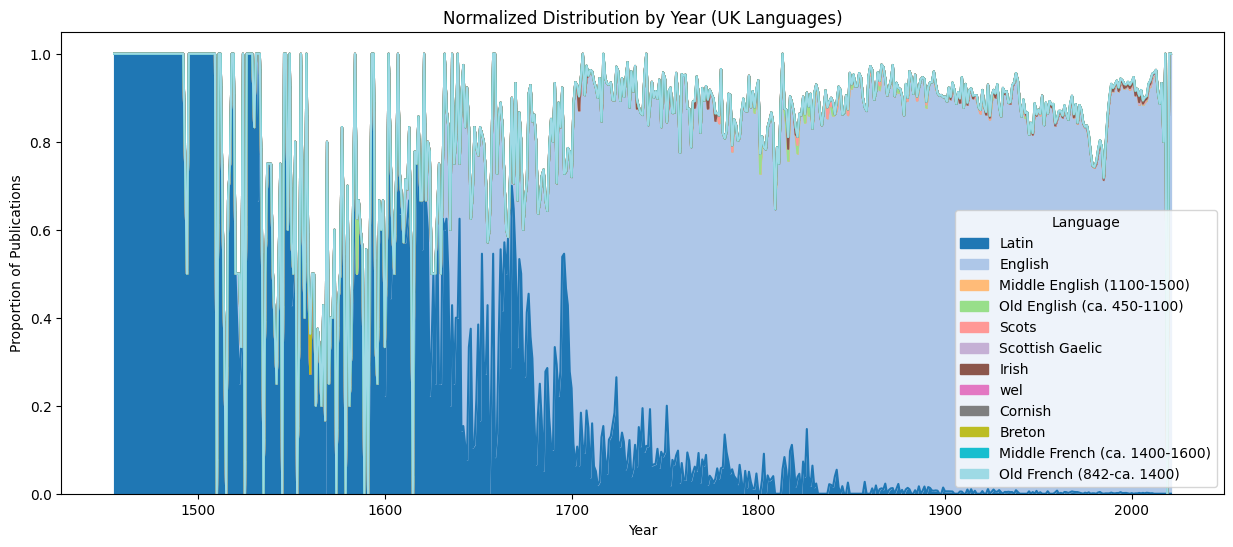

In [96]:
# List of UK languages present in the dataset
uk_languages = [
    "Latin",
    "English",
    "Middle English (1100-1500)",
    "Old English (ca. 450-1100)",
    "Scots",
    "Scottish Gaelic",
    "Irish",
    "wel",
    "Cornish",
    "Breton",
    "Middle French (ca. 1400-1600)",
    "Old French (842-ca. 1400)",
    "Manx"
]

# Filter to only those present in lang_year_norm columns
uk_langs_present = [lang for lang in uk_languages if lang in lang_year_norm.columns]

# Plot the normalized distribution for UK languages
lang_year_norm[uk_langs_present].plot(
    kind='area', stacked=True, figsize=(15,6), colormap='tab20'
)
plt.title('Normalized Distribution by Year (UK Languages)')
plt.xlabel('Year')
plt.ylabel('Proportion of Publications')
plt.legend(title='Language')
plt.show()

| Year        | Event                                          | Impact                                                                                 |
| ----------- | ---------------------------------------------- | -------------------------------------------------------------------------------------- |
| 1066        | Norman Conquest                                | Introduced Norman French; major influence on English vocabulary and official language. |
| 1290s–1500s | Decline of French, rise of Middle English      | English regains dominance; Scots develops as a distinct literary language.             |
| 1536–1543   | Acts of Union (England–Wales)                  | Welsh officially suppressed in administration.                                         |
| 1603        | Union of the Crowns (England–Scotland)         | English gains prestige in Scotland.                                                    |
| 1707        | Acts of Union (England–Scotland)               | London-centered English strengthens; Scots marginalized in print.                      |
| 1745        | Jacobite Rebellion defeat                      | Gaelic-speaking Highlands face repression; English spreads via schooling.              |
| 1801        | Act of Union (Great Britain–Ireland)           | English consolidates as administrative language; Irish declines in print.              |
| 1872        | Scottish Education Act                         | English becomes dominant in Scottish schools; Gaelic use declines further.             |
| 1893        | Welsh Intermediate Education Act               | Begins revival of Welsh education.                                                     |
| 1940s–1970s | Celtic revival movements                       | Gaelic, Welsh, Irish language revival efforts.                                         |
| 1998        | Gaelic Language (Scotland) Act preparation era | Moves toward official recognition of Gaelic.                                           |


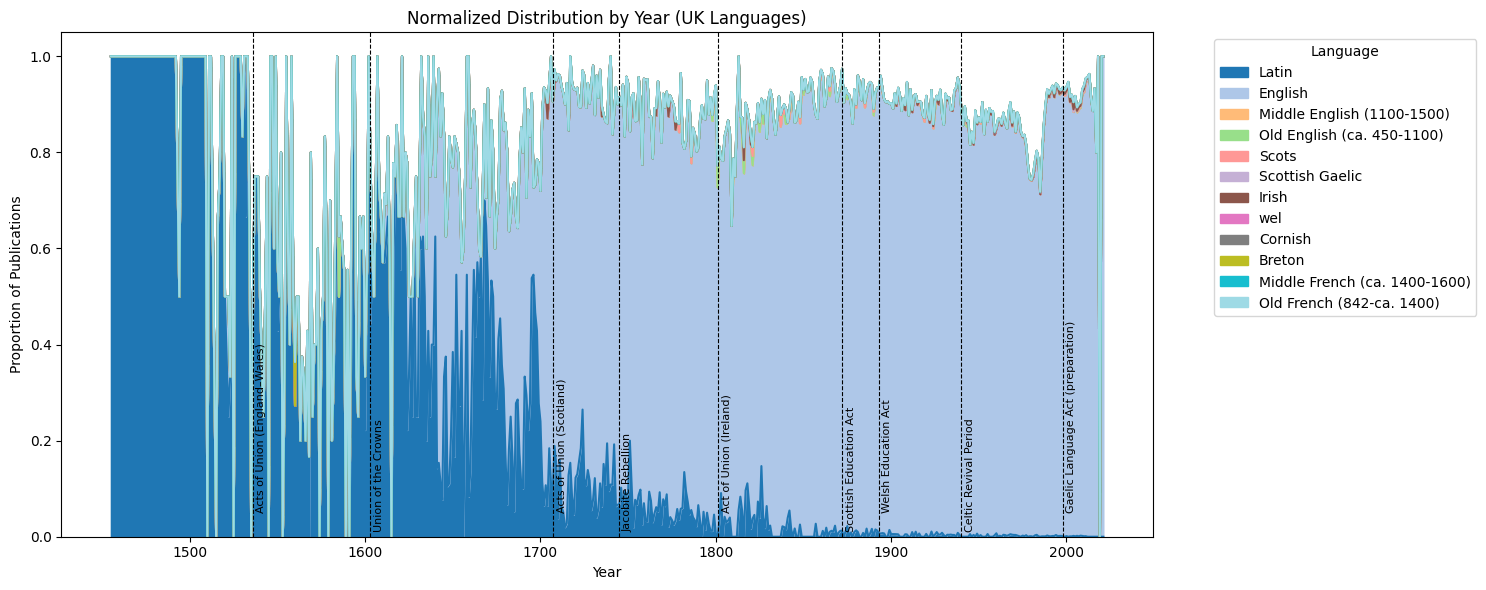

In [97]:
# Convert the index to integer years if needed
lang_year_norm.index = lang_year_norm.index.astype(int)

# Filter to present languages
uk_langs_present = [lang for lang in uk_languages if lang in lang_year_norm.columns]

# Plot the normalized distribution
ax = lang_year_norm[uk_langs_present].plot(
    kind='area', stacked=True, figsize=(15,6), colormap='tab20'
)

plt.title('Normalized Distribution by Year (UK Languages)')
plt.xlabel('Year')
plt.ylabel('Proportion of Publications')
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')

# Key historical events
events = {
    1066: "Norman Conquest",
    1536: "Acts of Union (England–Wales)",
    1603: "Union of the Crowns",
    1707: "Acts of Union (Scotland)",
    1745: "Jacobite Rebellion",
    1801: "Act of Union (Ireland)",
    1872: "Scottish Education Act",
    1893: "Welsh Education Act",
    1940: "Celtic Revival Period",
    1998: "Gaelic Language Act (preparation)"
}

# Add vertical lines and staggered annotations
y_offset = [0.01, 0.05]  # alternate offsets for readability
for i, (year, label) in enumerate(events.items()):
    if year in lang_year_norm.index:  # only plot if within your data range
        plt.axvline(x=year, color='black', linestyle='--', linewidth=0.8)
        offset = y_offset[i % len(y_offset)]
        plt.text(year+2, offset, label, rotation=90, fontsize=8, va='bottom')

plt.tight_layout()
plt.show()


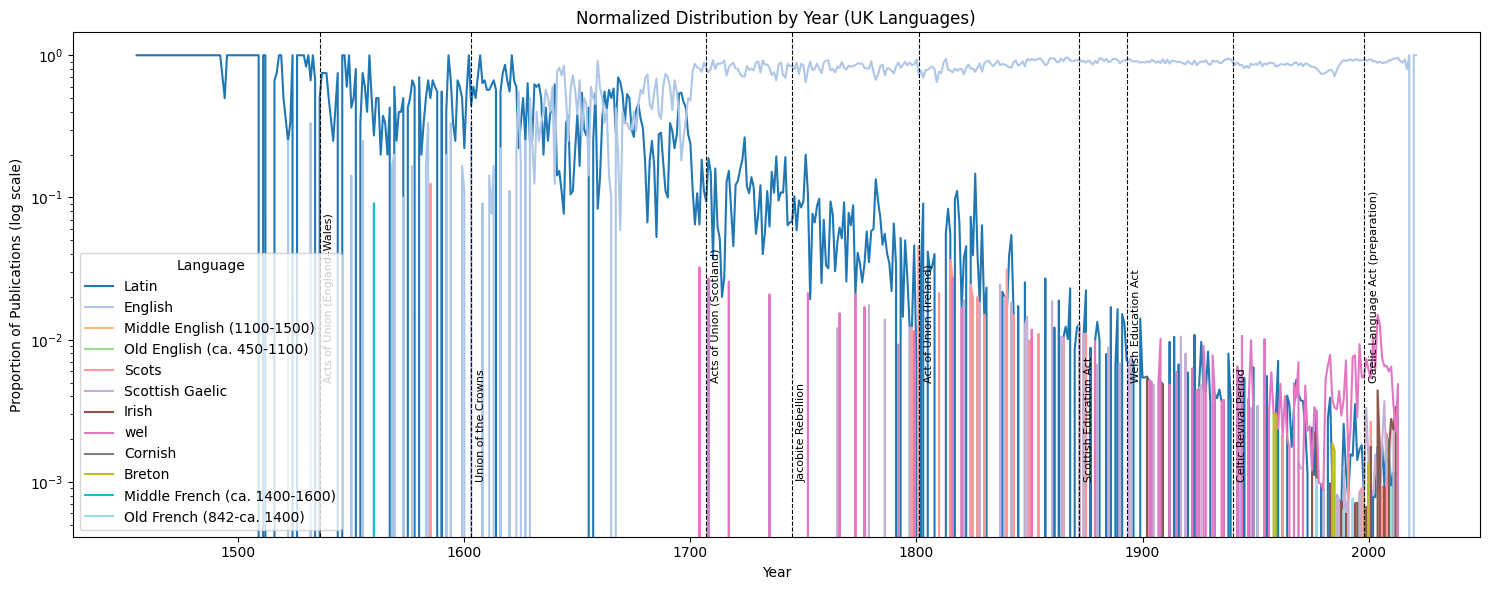

In [98]:
# Filter to only those present in lang_year_norm columns
uk_langs_present = [lang for lang in uk_languages if lang in lang_year_norm.columns]

# Plot the normalized distribution for UK languages as line plots
ax = lang_year_norm[uk_langs_present].plot(
    kind='line', figsize=(15,6), colormap='tab20'
)

# Add vertical lines and staggered annotations
y_offset = [1e-3, 5e-3]  # adjusted for log scale visibility
for i, (year, label) in enumerate(events.items()):
    if year in lang_year_norm.index:  # only plot if within your data range
        plt.axvline(x=year, color='black', linestyle='--', linewidth=0.8)
        offset = y_offset[i % len(y_offset)]
        plt.text(year + 2, offset, label, rotation=90, fontsize=8, va='bottom')

# Apply log scale
plt.yscale('log')

# Labels and layout
plt.title('Normalized Distribution by Year (UK Languages)')
plt.xlabel('Year')
plt.ylabel('Proportion of Publications (log scale)')
plt.legend(title='Language')
plt.tight_layout()
plt.show()


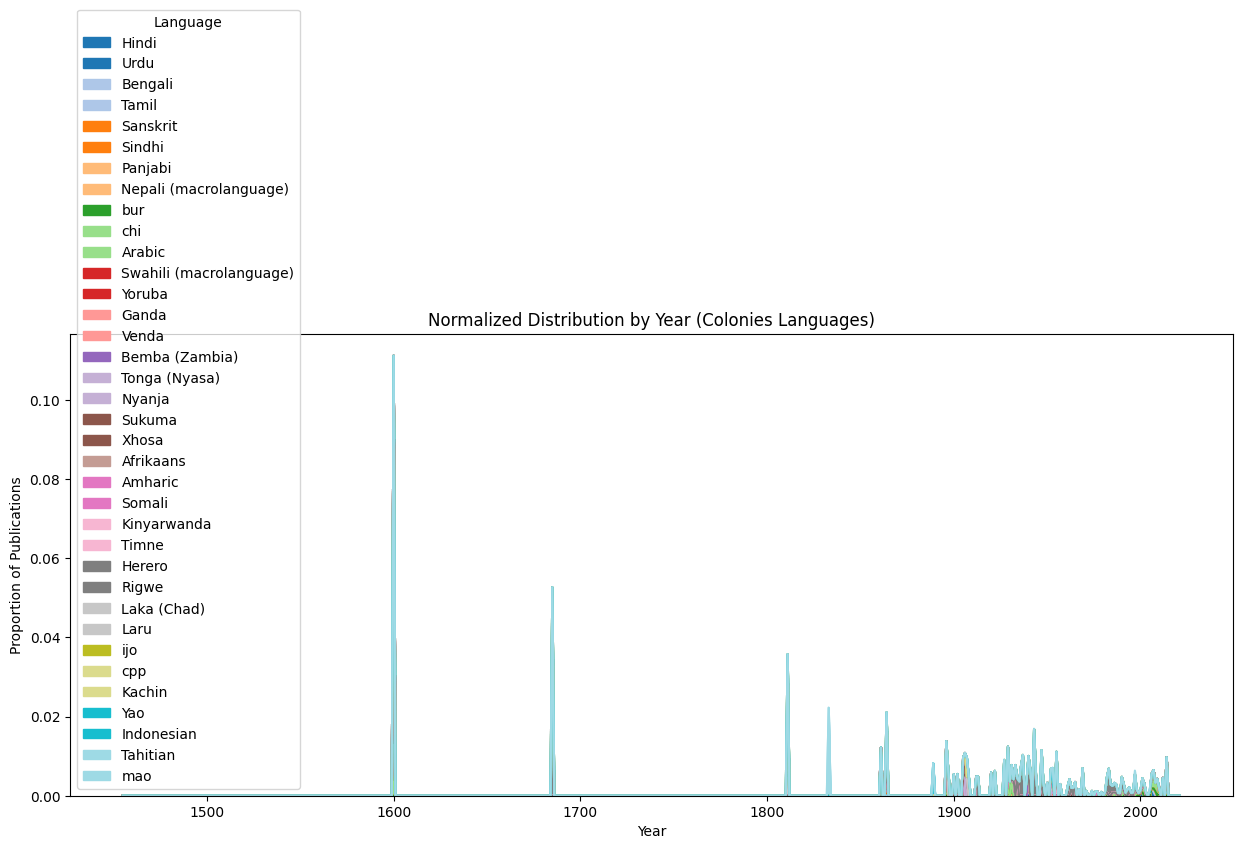

In [99]:
colonies_languages = [
   "Hindi",
    "Urdu",
    "Bengali",
    "Tamil",
    "Sanskrit",
    "Sindhi",
    "Panjabi",
    "Nepali (macrolanguage)",
    "bur",
    "chi",
    "Arabic",
    "Swahili (macrolanguage)",
    "Yoruba",
    "Ganda",
    "Venda",
    "Bemba (Zambia)",
    "Tonga (Nyasa)",
    "Nyanja",
    "Sukuma",
    "Xhosa",
    "Afrikaans",
    "Amharic",
    "Somali",
    "Kinyarwanda",
    "Timne",
    "Herero",
    "Rigwe",
    "Laka (Chad)",
    "Laru",
    "ijo",
    "cpp",
    "Kachin",
    "Yao",
    "Indonesian",
    "Tahitian",
    "mao"
]

# Filter to only those present in lang_year_norm columns
colonies_langs_present = [lang for lang in colonies_languages if lang in lang_year_norm.columns]

# Plot the normalized distribution for colonies languages
lang_year_norm[colonies_langs_present].plot(
    kind='area', stacked=True, figsize=(15,6), colormap='tab20'
)
plt.title('Normalized Distribution by Year (Colonies Languages)')
plt.xlabel('Year')
plt.ylabel('Proportion of Publications')

plt.legend(title='Language')
plt.show()

| Year  | Event                              | Impact                                                         |
| ----- | ---------------------------------- | -------------------------------------------------------------- |
| 1600  | East India Company founded         | Early English influence in India begins                        |
| 1757  | Battle of Plassey                  | British consolidate control in Bengal (English/Urdu influence) |
| 1795  | Cape Colony British control        | English influence in South Africa; Afrikaans affected          |
| 1801  | Act of Union (UK)                  | British administration expands overseas                        |
| 1815  | British take control of Sri Lanka  | Tamil/Sinhalese under colonial administration                  |
| 1833  | Slavery abolished in colonies      | Socioeconomic shifts in Caribbean; English dominance           |
| 1858  | British Raj established in India   | English becomes administrative/educational language            |
| 1880s | Colonization in Africa intensifies | English, Swahili, Yoruba, Xhosa formalized in administration   |
| 1947  | Independence of India & Pakistan   | Shift from English to local languages in official use          |
| 1960s | African nations gain independence  | English maintains role; local languages gain print presence    |


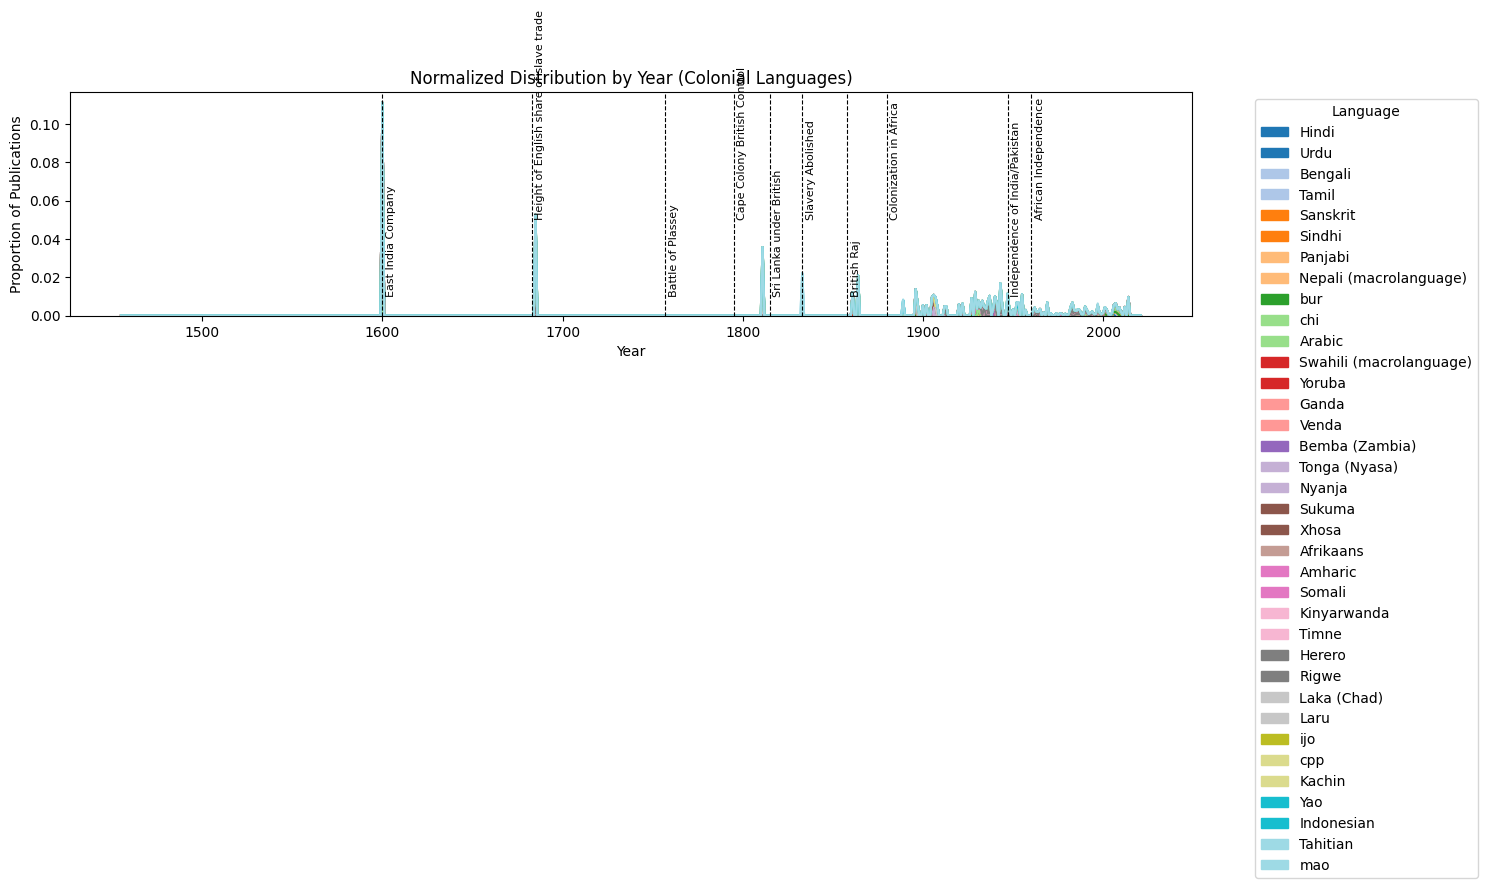

In [108]:
# Filter for colonial languages present in dataset
colonies_langs_present = [lang for lang in colonies_languages if lang in lang_year_norm.columns]

# Plot stacked area
ax = lang_year_norm[colonies_langs_present].plot(
    kind='area',
    stacked=True,
    figsize=(15,6),
    colormap='tab20'
)

plt.title('Normalized Distribution by Year (Colonial Languages)')
plt.xlabel('Year')
plt.ylabel('Proportion of Publications')
plt.legend(title='Language', bbox_to_anchor=(1.05,1), loc='upper left')

# Historical events
events = {
    1600: "East India Company",
    1683: "Height of English share of slave trade",
    1757: "Battle of Plassey",
    1795: "Cape Colony British Control",
    1815: "Sri Lanka under British",
    1833: "Slavery Abolished",
    1858: "British Raj",
    1880: "Colonization in Africa",
    1947: "Independence of India/Pakistan",
    1960: "African Independence"
}

# Add vertical lines and staggered labels
y_offset = [0.01, 0.05]
for i, (year, label) in enumerate(events.items()):
    if year in lang_year_norm.index:
        plt.axvline(x=year, color='black', linestyle='--', linewidth=0.8)
        offset = y_offset[i % len(y_offset)]
        plt.text(year+2, offset, label, rotation=90, fontsize=8, va='bottom')

plt.tight_layout()
plt.show()


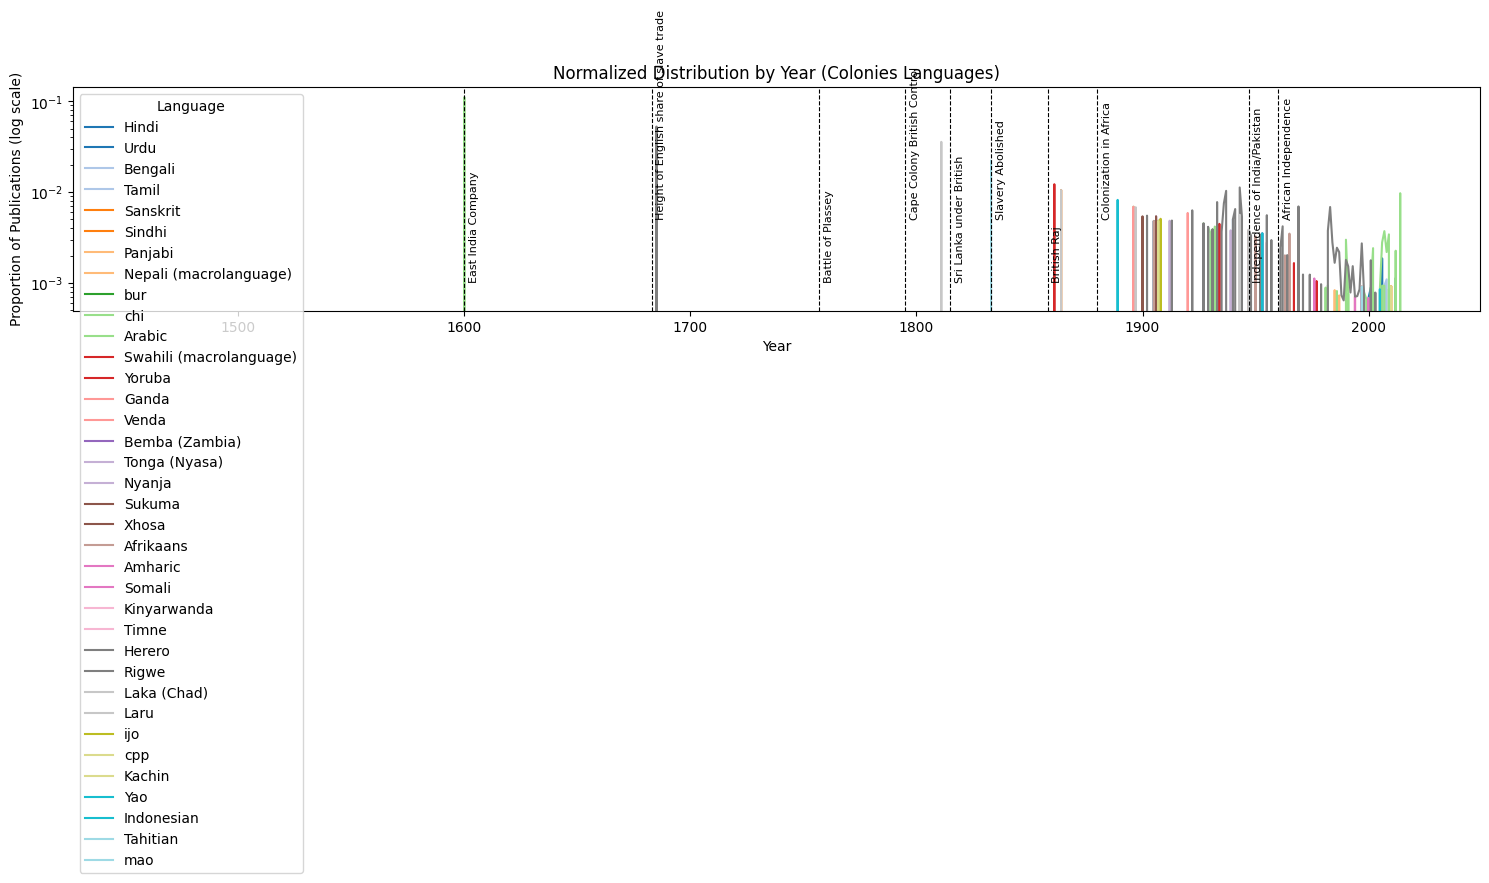

In [ ]:
# Filter to only those present in lang_year_norm columns
colonies_langs_present = [lang for lang in colonies_languages if lang in lang_year_norm.columns]

# Plot the normalized distribution for colonies languages as line plots
ax = lang_year_norm[colonies_langs_present].plot(
    kind='line', figsize=(15,6), colormap='tab20'
)

# Add vertical lines and staggered annotations
y_offset = [1e-3, 5e-3]  # adjusted for log scale visibility
for i, (year, label) in enumerate(events.items()):
    year = int(year)
    if year in lang_year_norm.index.astype(int):  # ensure type match
        plt.axvline(x=year, color='black', linestyle='--', linewidth=0.8)
        offset = y_offset[i % len(y_offset)]
        plt.text(year + 2, offset, label, rotation=90, fontsize=8, va='bottom')

# Apply log scale
plt.yscale('log')

# Labels and layout
plt.title('Normalized Distribution by Year (Colonies Languages)')
plt.xlabel('Year')
plt.ylabel('Proportion of Publications (log scale)')
plt.legend(title='Language')
plt.tight_layout()
plt.show()

In [14]:
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 21.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [nltk]3/4 [nltk]]


In [16]:
df.head()

,Title,Creator,Type,Publisher,Date,Language,Format,Relation,Rights,Identifier,Description,Subject,Coverage,Contributor,Source,Language_Full,Year
0,Travel /,"Leeson, Edward,1947-2011.",text,London J. Murray,1980,eng,,,,,,"Short stories, English.",,,,English,1980
1,Resource book of test items in chemistry,"Jenkins, E. W.(Edgar William)",text,London Murray,1981,eng,,,,,Bibliography: p15,Chemistry,,,,English,1981
2,Arbitration for contractors,"Stephenson, Douglas A.",text,Northwood Books,1982,,,,,,,,,,,,1982
3,Armorial bearings of the sovereigns of England...,"Petchey, William John. Browne, Royman. Standin...",text,London Bedford Square Press [for the] Standing...,1977,eng,,,,,"Previous ed.: i.e. Revised ed., published as '...",Heraldry,,,,English,1977
4,"Sharing caring : caring, equal opportunities a...","Thompson, Catherine.",text,Community Care Project,[1985],,,,,,,,,,,,1985


In [35]:
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources if not already present
nltk.download('punkt_tab')
nltk.download('stopwords')

# Helper function to tokenize and clean text
def tokenize(text):
    if not isinstance(text, str):
        return []
    # Tokenize, lowercase, remove punctuation and stopwords
    tokens = word_tokenize(text.lower())
    words = [w for w in tokens if w.isalpha()]
    stop_words = set(stopwords.words('english'))
    return [w for w in words if w not in stop_words]

# Compute word frequencies per year for Title and Description
def word_freq_by_year(df, column, min_year=1800, max_year=2021):
    freq_by_year = {}
    for year, group in df.groupby('Year'):
        try:
            year_int = int(year)
        except:
            continue
        if year_int < min_year or year_int > max_year:
            continue
        words = []
        for text in group[column]:
            words.extend(tokenize(text))
        freq_by_year[year_int] = Counter(words)
    return freq_by_year

title_freq_by_year = word_freq_by_year(df, 'Title')
desc_freq_by_year = word_freq_by_year(df, 'Description')

# Print most common N words in Title and Description per X years (e.g., every 50 years)
def most_common_words_by_period_dual(title_freq_by_year, desc_freq_by_year, period=50, top_n=10):
    min_year = min(set(title_freq_by_year.keys()) | set(desc_freq_by_year.keys()))
    max_year = max(set(title_freq_by_year.keys()) | set(desc_freq_by_year.keys()))
    for start in range(min_year, max_year + 1, period):
        end = min(start + period - 1, max_year)
        # Aggregate counters for the period
        title_counter = Counter()
        desc_counter = Counter()
        for year in range(start, end + 1):
            if year in title_freq_by_year:
                title_counter += title_freq_by_year[year]
            if year in desc_freq_by_year:
                desc_counter += desc_freq_by_year[year]
        if title_counter:
            print(f"Years {start}-{end}: Top {top_n} words in Title:", title_counter.most_common(top_n))
        else:
            print(f"Years {start}-{end}: No data in Title")
        if desc_counter:
            print(f"Years {start}-{end}: Top {top_n} words in Description:", desc_counter.most_common(top_n))
        else:
            print(f"Years {start}-{end}: No data in Description")

print("Most common words in Titles and Descriptions by period:")
most_common_words_by_period_dual(title_freq_by_year, desc_freq_by_year, period=50, top_n=10)


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/s2087805/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/s2087805/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most common words in Titles and Descriptions by period:
Years 1800-1849: Top 10 words in Title: [('microform', 222), ('de', 197), ('amp', 146), ('history', 124), ('church', 119), ('new', 111), ('life', 98), ('account', 93), ('et', 90), ('etc', 89)]
Years 1800-1849: Top 10 words in Description: [('title', 228), ('sabin', 134), ('page', 106), ('reads', 89), ('volume', 86), ('part', 79), ('dated', 73), ('line', 72), ('vol', 72), ('external', 67)]
Years 1850-1899: Top 10 words in Title: [('etc', 289), ('microform', 247), ('life', 236), ('de', 219), ('history', 210), ('church', 203), ('amp', 201), ('new', 147), ('england', 125), ('book', 121)]
Years 1850-1899: Top 10 words in Description: [('title', 165), ('sabin', 126), ('volume', 80), ('group', 73), ('part', 68), ('reads', 67), ('line', 62), ('unit', 61), ('first', 58), ('text', 56)]
Years 1900-1949: Top 10 words in Title: [('etc', 671), ('de', 423), ('plates', 420), ('life', 302), ('book', 290), ('history', 277), ('story', 231), ('la', 2

In [ ]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def most_common_words_by_language_period(df, period=50, top_n=10):
    # Helper: get stopwords for a language, fallback to English
    def get_stopwords(lang_code):
        try:
            sw_lang = set(stopwords.words(lang_code.lower()))
        except:
            sw_lang = set()
        try:
            sw_eng = set(stopwords.words('english'))
        except:
            sw_eng = set()
        return sw_lang.union(sw_eng)

    # Helper: tokenize and clean text for a language and English
    def tokenize(text, lang_code):
        if not isinstance(text, str):
            return []
        langs_used = []
        # Try language-specific tokenization
        try:
            tokens_lang = word_tokenize(text.lower(), language=lang_code)
            langs_used.append(lang_code)
        except:
            tokens_lang = []
        # Always tokenize in English as well
        try:
            tokens_eng = word_tokenize(text.lower(), language='english')
            langs_used.append('english')
        except:
            tokens_eng = []
        tokens = tokens_lang if tokens_lang else tokens_eng
        words = [w for w in tokens if w.isalpha()]
        stop_words = get_stopwords(lang_code)
        return [w for w in words if w not in stop_words], langs_used

    # Remove duplicate languages
    languages = sorted(set(df['Language_Full'].dropna().unique()))
    years = df['Year'].dropna().unique()
    years = [int(y) for y in years if str(y).isdigit()]
    min_year = min(years)
    max_year = max(years)

    for lang in languages:
        print(f"\nLanguage: {lang}")
        lang_df = df[df['Language_Full'] == lang]
        # Print most popular words in Title and Description for this language
        title_counter = Counter()
        desc_counter = Counter()
        for _, row in lang_df.iterrows():
            tokens_title, _ = tokenize(row['Title'], lang)
            tokens_desc, _ = tokenize(row['Description'], lang)
            title_counter.update(tokens_title)
            desc_counter.update(tokens_desc)
        print(f"  Most popular words in Title: {title_counter.most_common(top_n)}")
        print(f"  Most popular words in Description: {desc_counter.most_common(top_n)}")

        lang_years = lang_df['Year'].dropna().unique()
        lang_years = [int(y) for y in lang_years if str(y).isdigit()]
        for start in range(min_year, max_year + 1, period):
            end = min(start + period - 1, max_year)
            title_period_counter = Counter()
            desc_period_counter = Counter()
            langs_used_set = set()
            for year in range(start, end + 1):
                if year in lang_years:
                    period_rows = lang_df[lang_df['Year'] == str(year)]
                    for _, row in period_rows.iterrows():
                        tokens_title, langs_used_title = tokenize(row['Title'], lang)
                        tokens_desc, langs_used_desc = tokenize(row['Description'], lang)
                        title_period_counter.update(tokens_title)
                        desc_period_counter.update(tokens_desc)
                        langs_used_set.update(langs_used_title)
                        langs_used_set.update(langs_used_desc)
            if title_period_counter or desc_period_counter:
                print(f"  Years {start}-{end}: Top {top_n} words:")
                print(f"    Most popular words in Title: {title_period_counter.most_common(top_n)}")
                print(f"    Most popular words in Description: {desc_period_counter.most_common(top_n)}")
                print(f"    Tokenizer/stopwords used: {sorted(langs_used_set)}")
            else:
                print(f"  Years {start}-{end}: No data")

print("Most common words in Titles and Descriptions by language and period:")
most_common_words_by_language_period(df, period=50, top_n=10)


Most common words in Titles and Descriptions by language and period:

Language: English
  Most popular words in Title: [('report', 2796), ('amp', 2691), ('guide', 2269), ('new', 2003), ('resource', 1960), ('history', 1952), ('electronic', 1925), ('life', 1704), ('book', 1453), ('etc', 1368)]
  Most popular words in Description: [('includes', 13859), ('index', 11323), ('bibliographical', 10420), ('references', 10204), ('title', 9654), ('published', 5415), ('cover', 5357), ('book', 5060), ('new', 3285), ('based', 3237)]
  Years 1455-1504: No data
  Years 1505-1554: Top 10 words:
    Most popular words in Title: [('workes', 2), ('honor', 1), ('ye', 1), ('passion', 1), ('lorde', 1), ('compassyon', 1), ('blyssed', 1), ('lady', 1), ('moder', 1), ('chryste', 1)]
    Most popular words in Description: [('title', 3), ('ed', 3), ('also', 2), ('colophon', 2), ('halfsheet', 2), ('leaves', 2), ('wimbledon', 2), ('signatures', 1), ('cum', 1), ('priuilegio', 1)]
    Tokenizer/stopwords used: ['Englis

In [ ]:

    languages = df['Language_Full'].dropna().unique()
    years = df['Year'].dropna().unique()
    years = [int(y) for y in years if str(y).isdigit()]
    min_year = min(years)
    max_year = max(years)
    # Print most common words by language and period
    for lang in languages:
        print(f"\nLanguage: {lang}")
        lang_df = df[df['Language_Full'] == lang]
        lang_years = lang_df['Year'].dropna().unique()
        lang_years = [int(y) for y in lang_years if str(y).isdigit()]
        for start in range(min_year, max_year + 1, period):
            end = min(start + period - 1, max_year)
            title_counter = Counter()
            desc_counter = Counter()
            langs_used_set = set()
            # Filter rows in this period
            period_mask = lang_df['Year'].apply(lambda y: str(y).isdigit() and start <= int(y) <= end)
            period_df = lang_df[period_mask]
            if period_df.empty:
                continue  # skip periods with no data
            for _, row in period_df.iterrows():
                tokens_title, langs_used_title = tokenize(row['Title'], lang)
                tokens_desc, langs_used_desc = tokenize(row['Description'], lang)
                title_counter.update(tokens_title)
                desc_counter.update(tokens_desc)
                langs_used_set.update(langs_used_title)
                langs_used_set.update(langs_used_desc)
            if title_counter or desc_counter:
                print(f"  Years {start}-{end}: Top {top_n} words:")
                print(f"  Most popular words in Title: {title_counter.most_common(top_n)}")
                print(f"  Most popular words in Description: {desc_counter.most_common(top_n)}")
                print(f"  Tokenizer/stopwords used: {sorted(langs_used_set)}")